In [1]:
#importamos librerias 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", encoding="latin1")

In [28]:
from IPython.display import Image

Image(url="https://ipmark.com/wp-content/uploads/nuevo-modelo-de-negocio-auge-del-ecommerce-ok-800x445.jpg")


In [3]:
df.sample(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385428,570197,23085,ANTIQUE SILVER BAUBLE LAMP,1,10/7/2011 15:45,10.40,13755.0,United Kingdom
148338,549234,21878,PACK OF 6 SANDCASTLE FLAGS ASSORTED,12,4/7/2011 11:12,0.85,16515.0,United Kingdom
190412,553191,22699,ROSES REGENCY TEACUP AND SAUCER,3,5/15/2011 13:22,2.95,13118.0,United Kingdom
127974,547249,21731,RED TOADSTOOL LED NIGHT LIGHT,3,3/22/2011 9:27,3.29,NaN,United Kingdom
182651,552562,23170,REGENCY TEA PLATE ROSES,12,5/10/2011 11:50,1.65,17581.0,United Kingdom
195278,553710,22413,METAL SIGN TAKE IT OR LEAVE IT,3,5/18/2011 15:35,2.95,17338.0,United Kingdom
516927,580022,23084,RABBIT NIGHT LIGHT,6,12/1/2011 11:44,2.08,14289.0,United Kingdom
199710,554099,23155,KNICKERBOCKERGLORY MAGNET ASSORTED,24,5/22/2011 13:20,0.83,16341.0,United Kingdom
23393,538198,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,6,12/10/2010 11:01,4.95,17827.0,United Kingdom
180096,552302,84970L,SINGLE HEART ZINC T-LIGHT HOLDER,10,5/8/2011 14:59,0.95,14606.0,United Kingdom


In [ ]:
#Una vez tenemos los datos cargados pasamos a organizar el EDA

In [4]:
#pasamos a ver el contenido de nuestro dataset 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
# Convertir la columna InvoiceDate a formato datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Ver rango de fechas
date_range = (df["InvoiceDate"].min(), df["InvoiceDate"].max())
date_range

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [6]:
num_duplicated = df.duplicated().sum()
print(f"Duplicados en este dataset: {num_duplicated}")

#pero se observa que estos duplicados son clientes que han comprado en varias ocasiones por lo tanto no eliminamos ya que 
#si lo hacemos eliminamos informacion buena 


Duplicados en este dataset: 5268


In [7]:
#vemos los nulos 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
porcentaje_datos = (df.isnull().sum() / len(df)) * 100
porcentaje_datos = porcentaje_datos.map(lambda x: f"{x:.2f}%")
print(f"Porcentaje de datos faltantes:\n{porcentaje_datos}")

Porcentaje de datos faltantes:
InvoiceNo       0.00%
StockCode       0.00%
Description     0.27%
Quantity        0.00%
InvoiceDate     0.00%
UnitPrice       0.00%
CustomerID     24.93%
Country         0.00%
dtype: object


In [9]:
#podemos observar que el 25% de costumerID es corrupto , pasamos a solucionar
print(df['CustomerID'].nunique(), "valores únicos de", len(df), "registros totales")#pero primero vemos si es unico o se repite
print(df[df['CustomerID'].isnull()].head())  # Muestra algunas filas sin ID
#la mejor opcion para poder hacer un analisis puro y sin modificacion es iterar "desconocido" en los nulos de esa manera tenemos la seguridad de tener todos los datos
df['CustomerID'].fillna('Desconocido', inplace=True)

4372 valores únicos de 541909 registros totales
     InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  United Kingdom  


In [10]:
#observamos que en la columna Description tiene un 0,27% 
df = df.dropna(subset=['Description'])#al ser un porcentaje tan bajo vale la pena eliminar y mantener puro el dataset
df.isnull().sum()#comprobamos que la faena esta bien echa !

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
#observamos que tenemos duplicados 
df[df.duplicated()].head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01 11:49:00,3.75,17920.0,United Kingdom


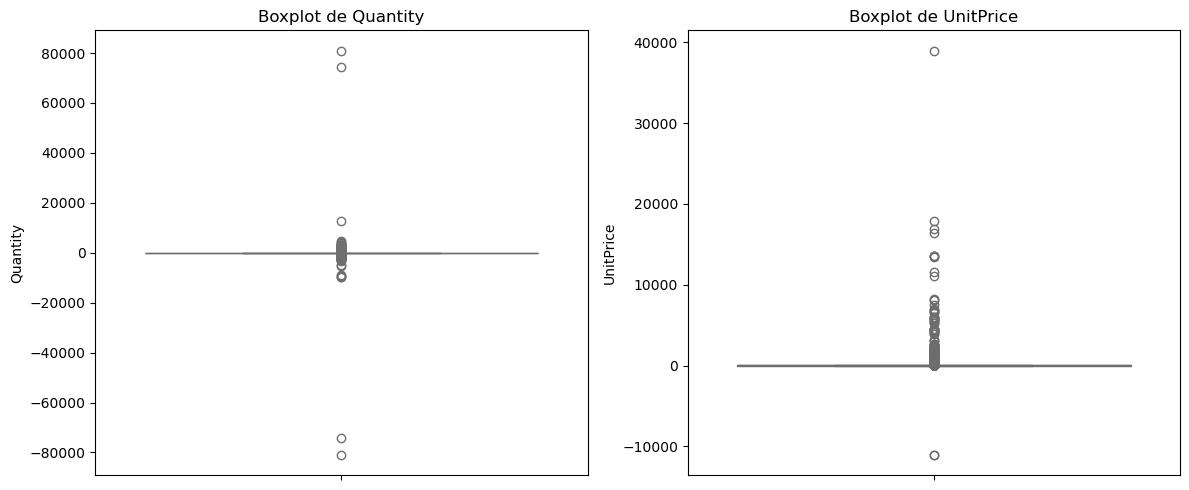

In [12]:
# Crear figura para boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot de Quantity
sns.boxplot(y=df["Quantity"], ax=axes[0], color="skyblue")
axes[0].set_title("Boxplot de Quantity")

# Boxplot de UnitPrice
sns.boxplot(y=df["UnitPrice"], ax=axes[1], color="salmon")
axes[1].set_title("Boxplot de UnitPrice")

# Mostrar gráficos
plt.tight_layout()
plt.show()

In [13]:
#Los boxplots confirman que hay valores atípicos extremos en ambas variables:
#Quantity → Algunas compras tienen cantidades muy grandes, lo que podría indicar pedidos mayoristas o errores en los datos.
#UnitPrice → Hay productos con precios muy altos, lo que podría ser productos premium o errores en el dataset.

In [14]:
#Voy a calcular los percentiles y los límites del rango intercuartílico (IQR)
#para detectar qué tan extremos son estos valores atípicos en Quantity y UnitPrice.

In [15]:
# Función para calcular los límites del rango intercuartílico (IQR)
def calcular_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return Q1, Q3, limite_inferior, limite_superior

# Calcular IQR para Quantity y UnitPrice
iqr_quantity = calcular_iqr("Quantity")
iqr_unitprice = calcular_iqr("UnitPrice")

# Contar cuántos valores están fuera de los límites
outliers_quantity = df[(df["Quantity"] < iqr_quantity[2]) | (df["Quantity"] > iqr_quantity[3])].shape[0]
outliers_unitprice = df[(df["UnitPrice"] < iqr_unitprice[2]) | (df["UnitPrice"] > iqr_unitprice[3])].shape[0]

iqr_quantity, iqr_unitprice, outliers_quantity, outliers_unitprice


((1.0, 10.0, -12.5, 23.5),
 (1.25, 4.13, -3.0700000000000003, 8.45),
 57967,
 39627)

In [16]:
#Cantidad (Quantity) → Valores normales entre 1 y 23.5, fuera de eso hay 57,967 registros atípicos.
#Precio (UnitPrice) → Valores normales entre 1.25 y 8.45, fuera de eso hay 39,627 registros atípicos.

In [17]:
#seguimos adelante con los datos si observamos que los outliers interfieren mucho volveremos a arreglar.

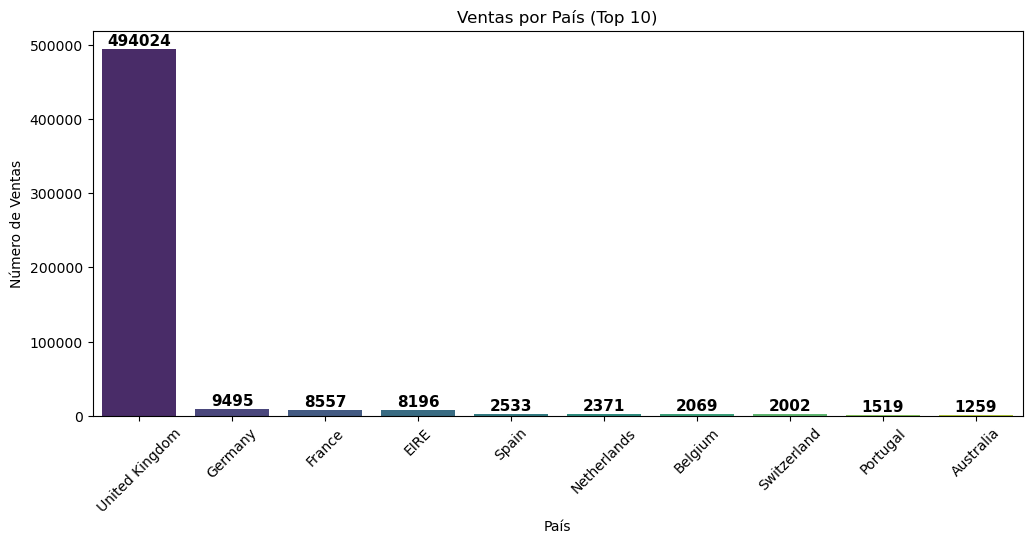

In [18]:
# Contar ventas por país
ventas_por_pais = df["Country"].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=ventas_por_pais.head(10).index, y=ventas_por_pais.head(10).values, hue=ventas_por_pais.head(10).index, palette="viridis", legend=False)

# Agregar etiquetas 
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height() + 500),
                ha="center", va="bottom", fontsize=11, color="black", fontweight="bold")

# Ajustar diseño
plt.xticks(rotation=45)
plt.title("Ventas por País (Top 10)")
plt.xlabel("País")
plt.ylabel("Número de Ventas")
plt.show()



In [19]:
#en este grafico observamos que Reino Unido tiene muchísimas más ventas que los demás países.
#esto puede indicar que el negocio opera desde Reino unido o tiene una base muy grande de clientes ahi 
#despues observamos que el resto de negocio es fuera , desde alemania hasta australia , podrian ser mercados secundarios 
#Veamos que productos se venden mas en Reino Unido

C:\Users\Jaume\AppData\Local\Temp\ipykernel_11664\2392942823.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=productos_mas_vendidos_uk.values, y=productos_mas_vendidos_uk.index, palette="magma")


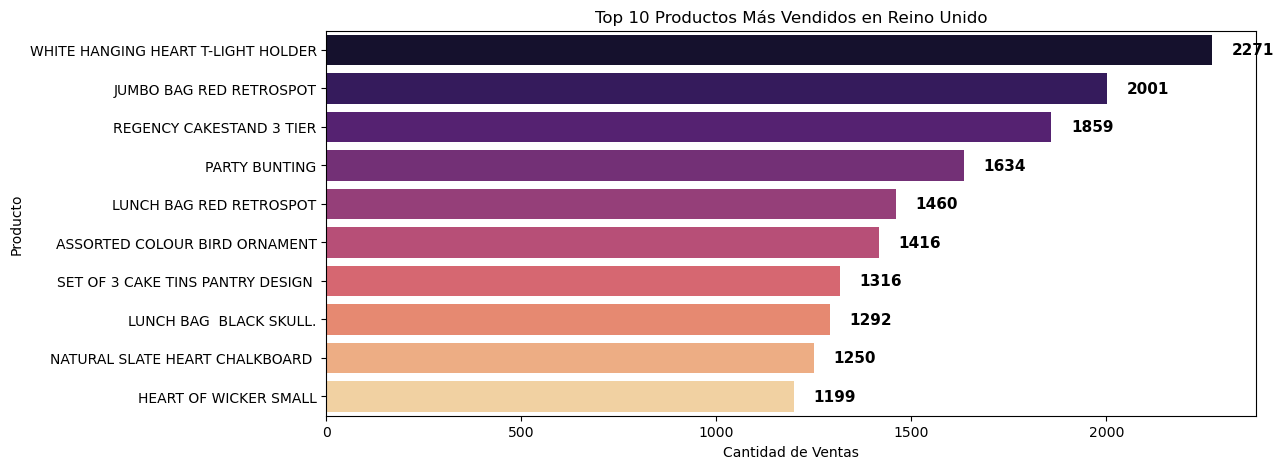

In [20]:
# Filtrar solo ventas de Reino Unido
df_uk = df[df["Country"] == "United Kingdom"]

#+ vendidos en Reino Unido
productos_mas_vendidos_uk = df_uk["Description"].value_counts().head(10)

#Top 10 de productos más vendidos en Reino Unido
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=productos_mas_vendidos_uk.values, y=productos_mas_vendidos_uk.index, palette="magma")

# Agregar etiquetas con el número de ventas
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", 
                (p.get_width() + 50, p.get_y() + p.get_height() / 2),  # Ajuste de posición
                ha="left", va="center", fontsize=11, color="black", fontweight="bold")


plt.title("Top 10 Productos Más Vendidos en Reino Unido")
plt.xlabel("Cantidad de Ventas")
plt.ylabel("Producto")
plt.show()


In [70]:
#Observaciones:
#Algunos productos son super populares y sacan mucha ventaja en la lista.
#La empresa podria enfocarse en promocionar estos productos en otros paises.

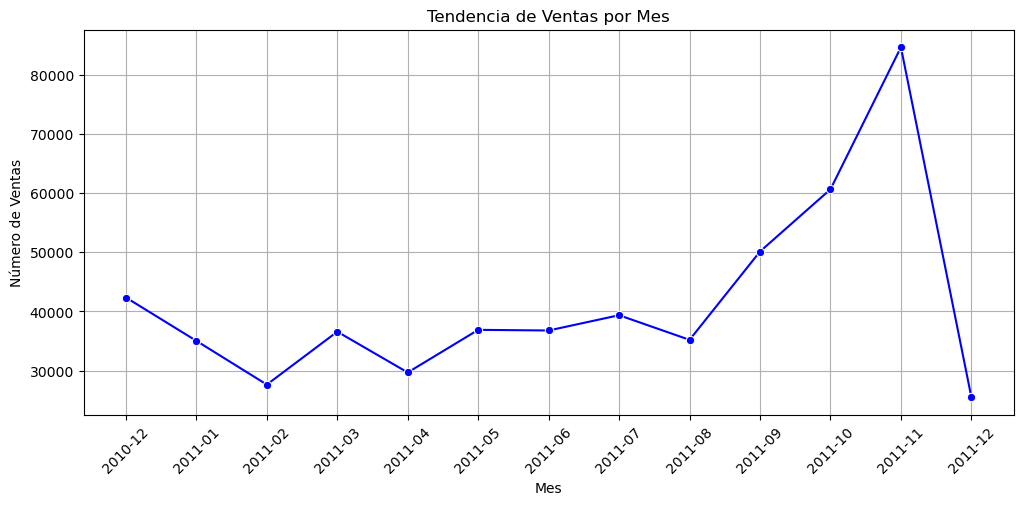

In [21]:
# Contar ventas por mes
ventas_mensuales = df.groupby(df["InvoiceDate"].dt.to_period("M"))["InvoiceNo"].count()

# Graficar ventas por mes
plt.figure(figsize=(12, 5))
sns.lineplot(x=ventas_mensuales.index.astype(str), y=ventas_mensuales.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Tendencia de Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Número de Ventas")
plt.grid(True)
plt.show()


In [ ]:
#Observaciones:
#Observamos que existe cierta estacionalidad en nuestras ventas por lo que podria ser bueno aumentar promociones y publicidad en esas fechas.
#vemos que en febrero es cuando menos ventas se producen , puede ser debido a que se acaba la epoca navideña


In [ ]:
#Una vez hemos visto el comportamiento de las ventas , considero que seria correcto analizar a los clientes ver que tipo de cliente es el que nos compra 
#a traves de clusters podremos verlos mejor 

In [22]:
df["TotalSpent"] = df["Quantity"] * df["UnitPrice"]
clientes_valiosos = df.groupby("CustomerID")["TotalSpent"].sum().sort_values(ascending=False)

# Definir los clusters de gasto (cuantiles)
q1 = clientes_valiosos.quantile(0.33)  # 33% de los clientes que menos gastan
q2 = clientes_valiosos.quantile(0.66)  # 66% de los clientes (nivel medio)

# Crear una nueva columna con los clusters
def categorizar_cliente(gasto):
    if gasto <= q1:
        return "Bajo"
    elif gasto <= q2:
        return "Medio"
    else:
        return "Alto"

# Aplicar la función de categorización
clientes_segmentados = clientes_valiosos.reset_index()
clientes_segmentados["Cluster"] = clientes_segmentados["TotalSpent"].apply(categorizar_cliente)

# Calcular la media de gasto en cada cluster
media_gasto_cluster = clientes_segmentados.groupby("Cluster")["TotalSpent"].mean()

# Contar cuántos clientes hay en cada grupo
clientes_por_cluster = clientes_segmentados["Cluster"].value_counts()


media_gasto_cluster, clientes_por_cluster


(Cluster
 Alto     5713.841736
 Bajo      194.180665
 Medio     672.947036
 Name: TotalSpent, dtype: float64,
 Alto     1487
 Medio    1443
 Bajo     1443
 Name: Cluster, dtype: int64)

In [ ]:
#Observacion :
# BAJO - gasto medio : 194.1 Pounds - cantidad de clientes en ese cluster: 1443
# MEDIO - gasto medio : 672,9 Pounds - cantidad de clientes en ese cluster: 1443
# ALTO - gasto medio : 5713.8 Pounds - cantidad de clientes en ese cluster: 1487

In [ ]:
#Clientes de Alto Valor  → Gastan mucho.
#Acción: Mantener su lealtad con descuentos VIP o productos exclusivos.

#Clientes de Medio Valor  → Tienen potencial de crecer.
#Acción: Ofrecer promociones para incentivarlos a comprar más.

#Clientes de Bajo Valor → Son la mayoría, pero gastan muy poco.
#Acción: Estrategias de "envío gratis con compra mínima" o paquetes con descuento.

In [76]:
# Calcular el ingreso total del negocio
ingreso_total = df["TotalSpent"].sum()

# Mostrar resultado
print("el negocio ha generado",ingreso_total,"pounds")

el negocio ha generado 9747747.933999997 pounds


In [ ]:
#El negocio ha generado un total de: 9,747,747.93 pounds en ventas.
#Seria interesante ver cuanto ha generado cada pais

C:\Users\Jaume\AppData\Local\Temp\ipykernel_11664\2151245563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=ingresos_pais.head(10).index,y=ingresos_pais.head(10).values, palette="Blues")


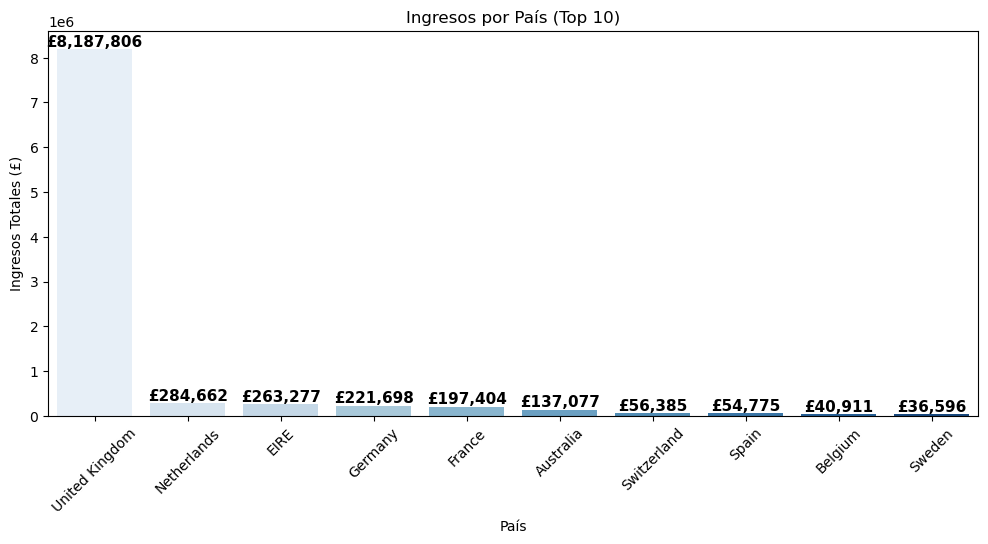

Country
United Kingdom    £8,187,806.36
Netherlands         £284,661.54
EIRE                £263,276.82
Germany             £221,698.21
France              £197,403.90
Australia           £137,077.27
Switzerland          £56,385.35
Spain                £54,774.58
Belgium              £40,910.96
Sweden               £36,595.91
Name: TotalSpent, dtype: object

In [23]:
ingresos_pais= df.groupby("Country")["TotalSpent"].sum().sort_values(ascending = False)
plt.figure(figsize=(12,5))
ax = sns.barplot(x=ingresos_pais.head(10).index,y=ingresos_pais.head(10).values, palette="Blues")

for p in ax.patches:
    ax.annotate(f"£{p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=11, fontweight="bold")


plt.xticks(rotation=45)
plt.title("Ingresos por País (Top 10)")
plt.xlabel("País")
plt.ylabel("Ingresos Totales (£)")
plt.show()

# Mostrar valores en tabla también
ingresos_pais.head(10).apply(lambda x: f"£{x:,.2f}")

In [ ]:
# Podemos observar que el mercadp mas fuerte es el Reino Unido
#otros paises como alemania ,Francia , Paises Bajos tambien pueden generar ingresos altos 
#Paises con ingresos medios pueden representar oportunidades de crecimiento y podriamos investigar porque hay pocas ventas

In [ ]:
#Productos mas rentables :
#Ahora vamos a identificar:
#Los productos que generan más ingresos.
#Si hay productos con alto volumen pero baja rentabilidad.
#Oportunidades para mejorar ventas en productos clave.

In [25]:
# Unir los códigos de producto con sus descripciones
productos_con_descripcion = df.groupby(["StockCode", "Description"])["TotalSpent"].sum().reset_index()

#productos más rentables 
top_productos_con_descripcion = productos_con_descripcion[productos_con_descripcion["StockCode"].isin(top_productos.index)]

# Ordenar por ingresos de + a -
top_productos_con_descripcion = top_productos_con_descripcion.sort_values(by="TotalSpent", ascending=False)
top_productos_con_descripcion["TotalSpent"] = top_productos_con_descripcion["TotalSpent"].apply(lambda x: f"£{x:,.2f}")


top_productos_con_descripcion


,StockCode,Description,TotalSpent
4780,DOT,DOTCOM POSTAGE,"£206,245.48"
1554,22423,REGENCY CAKESTAND 3 TIER,"£164,762.19"
3295,47566,PARTY BUNTING,"£98,302.98"
4223,85123A,WHITE HANGING HEART T-LIGHT HOLDER,"£97,715.99"
4197,85099B,JUMBO BAG RED RETROSPOT,"£92,356.03"
2344,23084,RABBIT NIGHT LIGHT,"£66,756.59"
4783,POST,POSTAGE,"£66,230.64"
1207,22086,PAPER CHAIN KIT 50'S CHRISTMAS,"£63,791.94"
3956,84879,ASSORTED COLOUR BIRD ORNAMENT,"£58,959.73"
3525,79321,CHILLI LIGHTS,"£53,768.06"


In [26]:
#Tras analizar los datos del e-commerce, hemos identificado oportunidades clave para mejorar el rendimiento del negocio.
"""
1️⃣ Clientes VIP: Fidelización y Retención 🏆
📌 Acción recomendada:
✅ Implementar programas de lealtad con descuentos exclusivos.
✅ Ofrecer beneficios adicionales (envíos gratuitos, acceso anticipado a productos).

2️⃣ Recuperación de Clientes Perdidos 🔄
📌 Acción recomendada:
✅ Campañas de email marketing con ofertas personalizadas.
✅ Descuentos exclusivos para incentivar nuevas compras.
✅ Encuestas para entender por qué dejaron de comprar.

3️⃣ Expansión en Mercados con Potencial 🌍
📌 Acción recomendada:
✅ Aumentar inversión en marketing digital en países con ingresos medios.
✅ Ajustar estrategias de precios y analizar barreras de entrada.

4️⃣ Optimización de Productos Rentables 💰
📌 Acción recomendada:
✅ Asegurar stock suficiente para evitar pérdidas de ventas.
✅ Implementar estrategias de cross-selling con productos complementarios.
✅ Publicidad enfocada en los productos más vendidos.

"""

'\n1️⃣ Clientes VIP: Fidelización y Retención 🏆\n📌 Acción recomendada:\n✅ Implementar programas de lealtad con descuentos exclusivos.\n✅ Ofrecer beneficios adicionales (envíos gratuitos, acceso anticipado a productos).\n\n2️⃣ Recuperación de Clientes Perdidos 🔄\n📌 Acción recomendada:\n✅ Campañas de email marketing con ofertas personalizadas.\n✅ Descuentos exclusivos para incentivar nuevas compras.\n✅ Encuestas para entender por qué dejaron de comprar.\n\n3️⃣ Expansión en Mercados con Potencial 🌍\n📌 Acción recomendada:\n✅ Aumentar inversión en marketing digital en países con ingresos medios.\n✅ Ajustar estrategias de precios y analizar barreras de entrada.\n\n4️⃣ Optimización de Productos Rentables 💰\n📌 Acción recomendada:\n✅ Asegurar stock suficiente para evitar pérdidas de ventas.\n✅ Implementar estrategias de cross-selling con productos complementarios.\n✅ Publicidad enfocada en los productos más vendidos.\n\n'